In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/cyberbullying-classification/cyberbullying_tweets.csv


In [3]:
df = pd.read_csv('/kaggle/input/cyberbullying-classification/cyberbullying_tweets.csv') 

In [4]:
df.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47692 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          47692 non-null  object
 1   cyberbullying_type  47692 non-null  object
dtypes: object(2)
memory usage: 745.3+ KB


In [6]:
df['cyberbullying_type'].value_counts()

cyberbullying_type
religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Name: count, dtype: int64

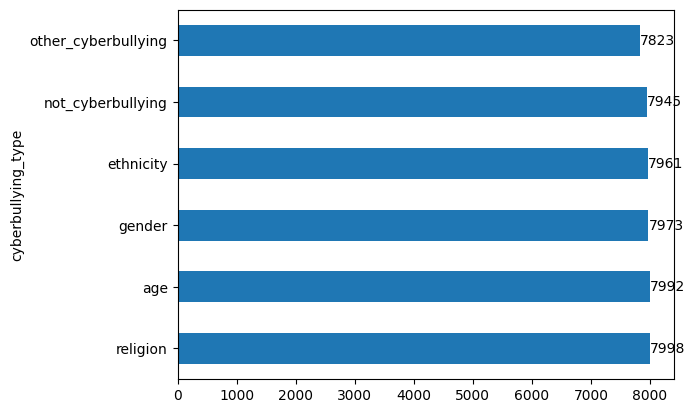

In [7]:
ax = df['cyberbullying_type'].value_counts().plot(kind='barh')
ax.bar_label(ax.containers[0])
plt.show()

In [9]:
# Check for missing values
print(df.isnull().sum())

# Drop missing values if any
df.dropna(inplace=True)


tweet_text            0
cyberbullying_type    0
dtype: int64


In [10]:
import re

def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)  # Remove mentions
    text = re.sub(r'#\w+', '', text)  # Remove hashtags
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text

df['cleaned_text'] = df['tweet_text'].apply(clean_text)


## Data Preprocessing

In [11]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'cyberbullying_type' is the label column
le = LabelEncoder()
df['label'] = le.fit_transform(df['cyberbullying_type'])


In [ ]:
!pip install transformers


In [12]:

import torch
from transformers import BertTokenizer, BertModel

# Load pre-trained BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased')

# Tokenize the tweets
def bert_tokenize(text):
    tokens = tokenizer(text, padding='max_length', max_length=128, truncation=True, return_tensors='pt')
    return tokens

df['tokens'] = df['cleaned_text'].apply(bert_tokenize)

# Extract features using BERT
def extract_features(text):
    inputs = tokenizer(text, padding='max_length', max_length=128, truncation=True, return_tensors="pt")
    with torch.no_grad():
        outputs = bert_model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).squeeze()

df['bert_features'] = df['cleaned_text'].apply(extract_features)


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [19]:
import torch.nn as nn

class GRU_CRF_Model(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(GRU_CRF_Model, self).__init__()
        self.gru = nn.GRU(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # Reshape x to have sequence length of 1
        x = x.unsqueeze(1)  # Adding sequence dimension
        gru_out, _ = self.gru(x)  # Output shape: (batch_size, seq_length, hidden_size)
        
        # Use the last output of GRU
        out = self.fc(gru_out[:, -1, :])  # This should now work
        return out
    
# Define model parameters
input_dim = 768  # BERT embeddings size
hidden_dim = 128
output_dim = len(df['label'].unique())  # Number of classes

model = GRU_CRF_Model(input_dim, hidden_dim, output_dim)


In [17]:
# # Check the shapes of the bert_features first
# print("Shapes of BERT features:")
# for features in df['bert_features']:
#     print(np.array(features).shape)

Shapes of BERT features:
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(7

In [20]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Convert features directly to a tensor
X = torch.tensor(np.array(df['bert_features'].tolist()), dtype=torch.float32)  # Convert to float32
y = torch.tensor(df['label'].values, dtype=torch.long)  # Ensure labels are of the right type

# Create DataLoader for batch processing
dataset = TensorDataset(X, y)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# Define device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Move the model to the appropriate device
model.to(device)

# Define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# Training loop
num_epochs = 5
for epoch in range(num_epochs):
    total_loss = 0  # To keep track of the total loss for the epoch
    for inputs, labels in dataloader:
        inputs, labels = inputs.to(device), labels.to(device)  # Move to device

        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backpropagation and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()  # Accumulate loss

    average_loss = total_loss / len(dataloader)  # Average loss per epoch
    print(f'Epoch {epoch + 1}/{num_epochs}, Average Loss: {average_loss:.4f}')


Epoch 1/5, Average Loss: 0.5954
Epoch 2/5, Average Loss: 0.4908
Epoch 3/5, Average Loss: 0.4552
Epoch 4/5, Average Loss: 0.4265
Epoch 5/5, Average Loss: 0.4030


In [21]:
class FocalLoss(nn.Module):
    def __init__(self, gamma=2, alpha=0.25):
        super(FocalLoss, self).__init__()
        self.gamma = gamma
        self.alpha = alpha

    def forward(self, inputs, targets):
        CE_loss = nn.CrossEntropyLoss()(inputs, targets)
        pt = torch.exp(-CE_loss)
        F_loss = self.alpha * (1 - pt) ** self.gamma * CE_loss
        return F_loss

# Use FocalLoss instead of CrossEntropyLoss
criterion = FocalLoss()


In [23]:
# Evaluation function
def evaluate_model(model, dataloader, device):
    model.eval()
    predictions, true_labels = [], []

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)  # Move inputs and labels to device
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            predictions.extend(preds.cpu().numpy())  # Move predictions back to CPU
            true_labels.extend(labels.cpu().numpy())  # Move labels back to CPU

    return classification_report(true_labels, predictions, digits=4)


In [25]:
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    np.array(df['bert_features'].tolist()), df['label'].values, test_size=0.2, random_state=42)

# Convert them into tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)

X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Create TensorDataset for both training and test sets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)


In [28]:
# import matplotlib.pyplot as plt
# import torch

# # Ensure the model is on the right device
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model.to(device)

# # Training loop with tracking
# num_epochs = 20
# train_losses = []
# train_accuracies = []

# for epoch in range(num_epochs):
#     epoch_loss = 0
#     correct_predictions = 0
#     total_predictions = 0
    
#     for inputs, labels in dataloader:
#         # Move inputs and labels to the correct device
#         inputs, labels = inputs.to(device), labels.to(device)

#         # Forward pass
#         outputs = model(inputs)
#         loss = criterion(outputs, labels)

#         # Backpropagation and optimization
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()
        
#         # Accumulate epoch loss
#         epoch_loss += loss.item()

#         # Calculate accuracy
#         _, preds = torch.max(outputs, 1)
#         correct_predictions += torch.sum(preds == labels).item()
#         total_predictions += labels.size(0)

#     # Calculate average loss and accuracy for the epoch
#     epoch_loss /= len(dataloader)
#     epoch_accuracy = correct_predictions / total_predictions

#     # Store loss and accuracy for each epoch
#     train_losses.append(epoch_loss)
#     train_accuracies.append(epoch_accuracy)

#     print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss}, Accuracy: {epoch_accuracy}')




Epoch 1/20, Loss: 0.007744325257384214, Accuracy: 0.8622829824708547
Epoch 2/20, Loss: 0.006828936569816336, Accuracy: 0.8683426989851547
Epoch 3/20, Loss: 0.005667041958250117, Accuracy: 0.8770234001509687
Epoch 4/20, Loss: 0.004927961405796023, Accuracy: 0.8830411809108446
Epoch 5/20, Loss: 0.004297098339292608, Accuracy: 0.8889331544074478
Epoch 6/20, Loss: 0.003549542327653302, Accuracy: 0.8962509435544745
Epoch 7/20, Loss: 0.003229672871142981, Accuracy: 0.899731611171685
Epoch 8/20, Loss: 0.002776672825676389, Accuracy: 0.9060219743353183
Epoch 9/20, Loss: 0.002424984682548265, Accuracy: 0.9117252369370125
Epoch 10/20, Loss: 0.002033414045459779, Accuracy: 0.91805753585507
Epoch 11/20, Loss: 0.0018767937183504237, Accuracy: 0.9187914115574939
Epoch 12/20, Loss: 0.0018487294660144197, Accuracy: 0.9219156252620985
Epoch 13/20, Loss: 0.0015105842401761521, Accuracy: 0.9268850121613688
Epoch 14/20, Loss: 0.0013844298024080623, Accuracy: 0.9291285750230647
Epoch 15/20, Loss: 0.0012812

In [34]:
import matplotlib.pyplot as plt
import torch
from torch.utils.data import DataLoader, random_split

# Ensure the model is on the right device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Assume 'dataset' is defined and loaded earlier in your code
# Create training and validation dataloaders
train_size = int(0.8 * len(dataset))  # 80% for training
val_size = len(dataset) - train_size  # 20% for validation
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Training and validation loop with tracking
num_epochs = 20
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

for epoch in range(num_epochs):
    # Training phase
    model.train()
    epoch_loss = 0
    correct_predictions = 0
    total_predictions = 0
    
    for inputs, labels in train_dataloader:  # Training dataloader
        # Move inputs and labels to the correct device
        inputs, labels = inputs.to(device), labels.to(device)

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backpropagation and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Accumulate epoch loss
        epoch_loss += loss.item()

        # Calculate accuracy
        _, preds = torch.max(outputs, 1)
        correct_predictions += torch.sum(preds == labels).item()
        total_predictions += labels.size(0)

    # Calculate average training loss and accuracy for the epoch
    epoch_loss /= len(train_dataloader)
    epoch_accuracy = correct_predictions / total_predictions

    # Store training loss and accuracy
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_accuracy)

    # Validation phase
    model.eval()  # Set model to evaluation mode
    val_loss = 0
    correct_val_predictions = 0
    total_val_predictions = 0

    with torch.no_grad():  # No need to track gradients during validation
        for val_inputs, val_labels in val_dataloader:  # Validation dataloader
            # Move inputs and labels to the correct device
            val_inputs, val_labels = val_inputs.to(device), val_labels.to(device)

            # Forward pass for validation
            val_outputs = model(val_inputs)
            v_loss = criterion(val_outputs, val_labels)

            # Accumulate validation loss
            val_loss += v_loss.item()

            # Calculate validation accuracy
            _, val_preds = torch.max(val_outputs, 1)
            correct_val_predictions += torch.sum(val_preds == val_labels).item()
            total_val_predictions += val_labels.size(0)

    # Calculate average validation loss and accuracy for the epoch
    val_loss /= len(val_dataloader)
    val_accuracy = correct_val_predictions / total_val_predictions

    # Store validation loss and accuracy
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    # Print epoch results
    print(f'Epoch {epoch+1}/{num_epochs}, '
          f'Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.4f}, '
          f'Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}')



Epoch 1/20, Loss: 0.0014, Accuracy: 0.9360, Val Loss: 0.0010, Val Accuracy: 0.9407
Epoch 2/20, Loss: 0.0006, Accuracy: 0.9512, Val Loss: 0.0012, Val Accuracy: 0.9350
Epoch 3/20, Loss: 0.0005, Accuracy: 0.9521, Val Loss: 0.0015, Val Accuracy: 0.9306
Epoch 4/20, Loss: 0.0005, Accuracy: 0.9514, Val Loss: 0.0018, Val Accuracy: 0.9246
Epoch 5/20, Loss: 0.0006, Accuracy: 0.9495, Val Loss: 0.0017, Val Accuracy: 0.9207
Epoch 6/20, Loss: 0.0005, Accuracy: 0.9543, Val Loss: 0.0020, Val Accuracy: 0.9204
Epoch 7/20, Loss: 0.0005, Accuracy: 0.9544, Val Loss: 0.0023, Val Accuracy: 0.9150
Epoch 8/20, Loss: 0.0006, Accuracy: 0.9538, Val Loss: 0.0049, Val Accuracy: 0.8979
Epoch 9/20, Loss: 0.0005, Accuracy: 0.9547, Val Loss: 0.0021, Val Accuracy: 0.9219
Epoch 10/20, Loss: 0.0004, Accuracy: 0.9570, Val Loss: 0.0024, Val Accuracy: 0.9192
Epoch 11/20, Loss: 0.0004, Accuracy: 0.9559, Val Loss: 0.0035, Val Accuracy: 0.9084
Epoch 12/20, Loss: 0.0006, Accuracy: 0.9520, Val Loss: 0.0028, Val Accuracy: 0.9132
E

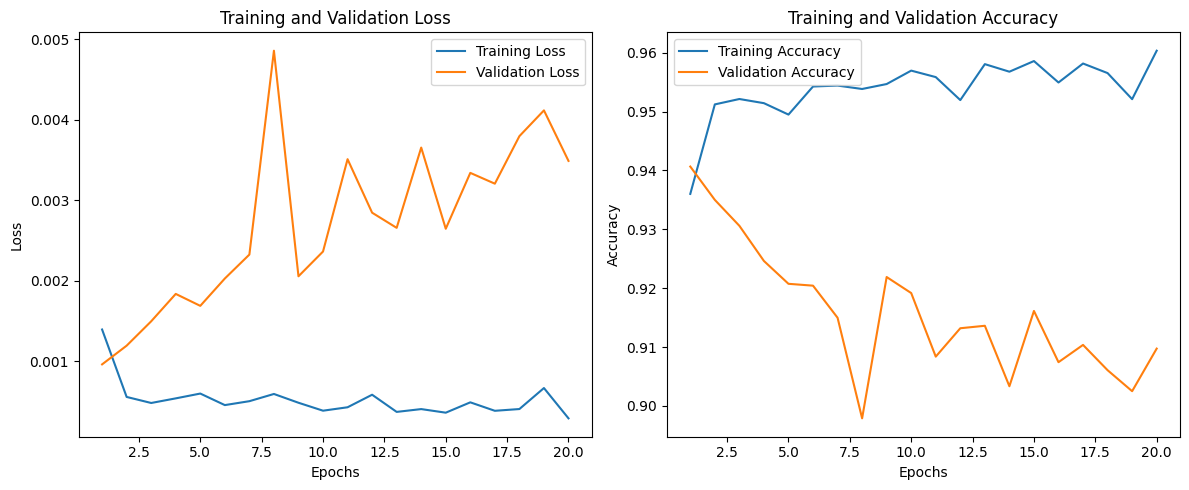

In [35]:
# After training, you can plot the results if needed
plt.figure(figsize=(12, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), train_accuracies, label='Training Accuracy')
plt.plot(range(1, num_epochs + 1), val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# Plot Accuracy vs Epochs
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_accuracies, label='Train Accuracy', color='blue')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss vs Epochs
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss', color='red')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


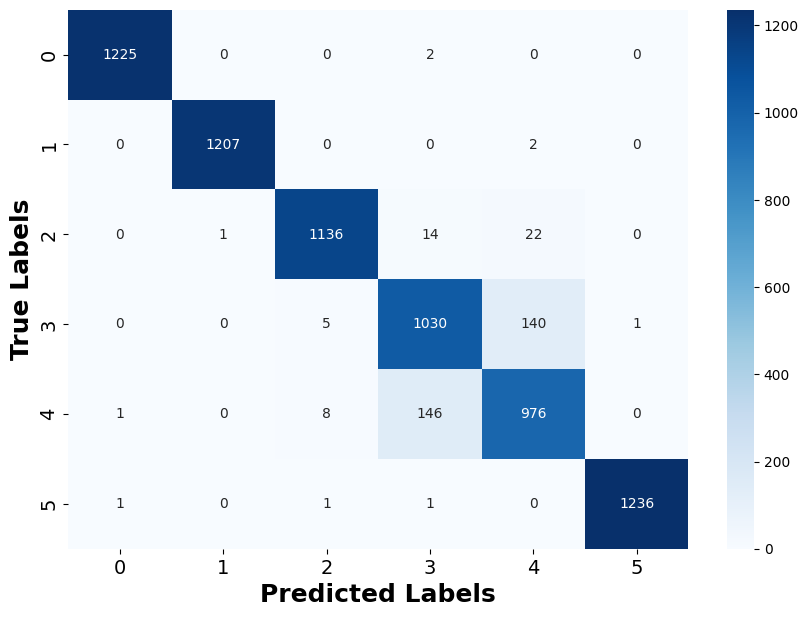

In [50]:
import torch
from torch.utils.data import DataLoader, random_split

# Assume 'dataset' is defined and loaded earlier in your code
# Create training, validation, and test dataloaders
train_size = int(0.7 * len(dataset))  # 70% for training
val_size = int(0.15 * len(dataset))   # 15% for validation
test_size = len(dataset) - train_size - val_size  # 15% for testing

train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

def evaluate_model(model, dataloader):
    model.eval()
    predictions, true_labels = [], []

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            predictions.extend(preds.cpu().numpy())
            true_labels.extend(labels.cpu().numpy())

    return predictions, true_labels

# Now you can evaluate the model using the test dataloader
predictions, true_labels = evaluate_model(model, test_dataloader)

# Generate confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Generate confusion matrix
cm = confusion_matrix(true_labels, predictions)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(true_labels),
            yticklabels=np.unique(true_labels))
plt.xlabel('Predicted Labels',weight="bold",fontsize=18)
plt.ylabel('True Labels',weight="bold",fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# plt.title('Confusion Matrix')
plt.show()


 


In [45]:
# Generate classification report
report = classification_report(true_labels, predictions)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1191
           1       1.00      1.00      1.00      1196
           2       0.98      0.96      0.97      1177
           3       0.88      0.87      0.87      1229
           4       0.84      0.87      0.85      1148
           5       1.00      1.00      1.00      1214

    accuracy                           0.95      7155
   macro avg       0.95      0.95      0.95      7155
weighted avg       0.95      0.95      0.95      7155



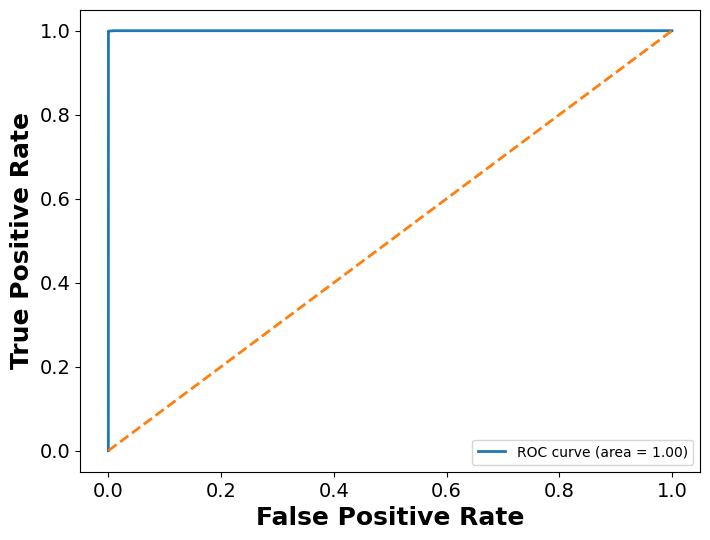

In [51]:
import torch

# Assuming you have defined a device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Move the model to the appropriate device
model.to(device)

# Get predicted probabilities
model.eval()
predicted_probs = []

with torch.no_grad():
    for inputs, _ in test_dataloader:
        # Move inputs to the same device as the model
        inputs = inputs.to(device)
        
        outputs = model(inputs)
        predicted_probs.extend(torch.softmax(outputs, dim=1).cpu().numpy())  # Move outputs to CPU before converting to numpy

predicted_probs = np.array(predicted_probs)

# Assuming binary classification; adjust for multiclass as necessary
fpr, tpr, thresholds = roc_curve(true_labels, predicted_probs[:, 1], pos_label=1)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr,  lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],  lw=2, linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate',fontsize=18,weight="bold")
plt.ylabel('True Positive Rate',fontsize=18,weight="bold")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
